In [2]:
# packs
import os
import fnmatch
import numpy as np
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

#funciones
def consulta_archivo(patron, ruta='../querys'):
    """
    Ejecuta una consulta en BigQuery utilizando un archivo SQL que coincide con un patrón.

    Parameters:
    - patron (str): El patrón para buscar el archivo SQL.
    - ruta (str, optional): La ruta del directorio donde se buscarán los archivos SQL. 
                           Por defecto, es '../querys'.

    Returns:
    - pandas.DataFrame or None: El resultado de la consulta en forma de DataFrame de pandas. 
                               Si no se encuentra el archivo SQL, retorna None.

    Example:
    ```python
    patron_busqueda = 'megabrands'
    df_resultado = consulta_archivo(patron_busqueda)
    ```

    """
    # Encuentra el archivo SQL utilizando el patrón
    for nombre_archivo in os.listdir(ruta):
        if fnmatch.fnmatch(nombre_archivo, f'*{patron}*.sql'):
            # Construye la ruta completa al archivo SQL
            ruta_completa_sql = os.path.join(ruta, nombre_archivo)
            print(nombre_archivo)
            # Lee el contenido del archivo SQL
            with open(ruta_completa_sql, "r") as file:
                sql = file.read()

            # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
            cliente = bigquery.Client()
            df_resultado = cliente.query(sql).to_dataframe()
            print(df_resultado.shape)
            print(df_resultado.head(2))
            return df_resultado

    # Si no se encuentra ningún archivo que coincida con el patrón
    print('No se encontró el archivo SQL.')
    return None


def plot_percentiles(df, column_name, percentile_limit=100):
    """
    Crea un histograma con líneas punteadas para los percentiles 33.33% y 66.67%.

    Parameters:
    - df (pandas.DataFrame): El DataFrame que contiene la columna de interés.
    - column_name (str): El nombre de la columna para la cual se calcularán los percentiles y se creará el histograma.
    - percentile_limit (float, optional): El percentil límite para filtrar los valores del DataFrame. Por defecto, es 100.

    Returns:
    - None: Muestra el histograma con las líneas punteadas.

    Example:
    ```python
    plot_percentiles(df, 'last_interaction_days', 100)
    ```

    """
    # Calcula el percentil límite
    percentile_value = np.percentile(df[column_name], percentile_limit)


    # Crea el subset excluyendo los valores superiores al percentil límite
    df_subset = df[df[column_name] <= percentile_value]

    # Calcula el histograma
    hist, bins = np.histogram(df_subset[column_name], bins=20)

    # Calcula percentiles
    percentiles = np.percentile(df_subset[column_name], [33.33, 66.67])
    print(percentiles)

    # Crea el histograma
    plt.hist(df_subset[column_name], bins=20, edgecolor='black', color=(255/255, 192/255, 0))
    plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
    plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

    # Añade etiquetas y título
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma y Percentiles ({column_name})')
    plt.legend()

    # Muestra el histograma
    plt.show()

# Ejemplo de uso con un DataFrame y una columna cualquiera
# plot_percentiles(df, 'tu_columna', 99)

# Llama a la función con el nombre de tu archivo SQL
# df_L2 = consulta_archivo('total')
# plot_percentiles(df_L2, 'last_interaction_days')



In [3]:
# Llama a la función con el nombre de tu archivo SQL
df_L1 = consulta_archivo('nes_mega')
# plot_percentiles(df_L1, 'Dias_interaccion')

interacciones_mega.sql
(1040836, 3)
                                              td_id1  nInteracciones  \
0  ec780f284973edb8d4788bc8bea8e946129b603e545068...               1   
1  17823ad14a90156cef8c809e0298c1053b4676e33ed715...               1   

   Dias_interaccion  
0               189  
1               189  


In [41]:
df_L1[df_L1['nInteracciones'] == 0].shape

(0, 3)

In [ ]:
dd

In [4]:
percentile_value_max = np.percentile(df_L1['nInteracciones'], 95)
df = df_L1[(df_L1['nInteracciones'] > 0) & (df_L1['nInteracciones'] < percentile_value_max)].copy()
df.shape

(987104, 3)

In [5]:
# Crear un nuevo DataFrame con valores menores o iguales a 1
menores1 = df[df['nInteracciones'] <= 1].copy()
print(menores1.shape)
# Excluir los valores menores o iguales a 1 del DataFrame original
df_final = df[df['nInteracciones'] > 1].copy()
print(df_final.shape)

(518719, 3)
(468385, 3)


[3.0 12.0]


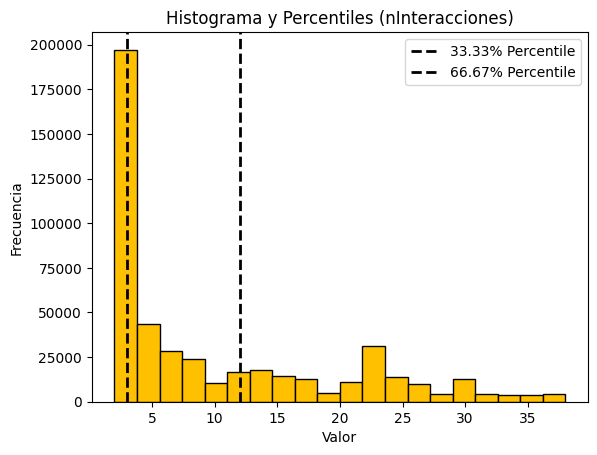

In [47]:
plot_percentiles(df_final, 'nInteracciones')

In [49]:
#  # Calcula el percentil límite
# percentile_value = np.percentile(df_final['nInteracciones'], 66)
# print(percentile_value)

11.0


In [16]:
#  # Calcula el percentil límite
# percentile_value = np.percentile(df_L1['nInteracciones'], 95)
# print(percentile_value)

32.0


In [28]:
df.shape

(574795, 3)

In [27]:
df[df['nInteracciones'] <= 2].shape

(329880, 3)

In [6]:
# Calcular deciles para ambas variables
df_final['corte_Dias_interaccion'] = pd.qcut(df_final['Dias_interaccion'], q=5, labels=False, duplicates='drop')
df_final['corte_nInteracciones'] = pd.qcut(df_final['nInteracciones'], q=6, labels=False, duplicates='drop')
# Crear una tabla de contingencia (matriz de cruces)
contingency_table = pd.crosstab(df_final['corte_Dias_interaccion'], df_final['corte_nInteracciones'])

# Imprimir la tabla de contingencia
print(contingency_table)

corte_nInteracciones        0      1      2      3      4
corte_Dias_interaccion                                   
0                       34489  13014  26433  10955   9697
1                       40187  14596  15517   9756  14091
2                       79001  11640   5194  15002  14215
3                       22148   1518   2988  11894  23411
4                       21089   2636  28892  35261   4761


In [7]:
df_final.head()

,td_id1,nInteracciones,Dias_interaccion,corte_Dias_interaccion,corte_nInteracciones
14,5f9ee112-ea73-47cc-b737-adbdc14fca72,16,189,4,3
16,f2928bf8653821b6ac8811464c1290ff7df65c294931e4...,3,189,4,0
28,aa27a98f-1f90-4eab-8a9e-0fddedd95191,33,189,4,4
30,968938720f3009c28ca243c55f558d87cd2e6059da0206...,2,189,4,0
31,0a430c31af297e6422d81a7c70d43cbff2e1ec13d5ca5c...,3,189,4,0


In [ ]:
df_L1.head(2)

In [ ]:
df_L1.head(2)

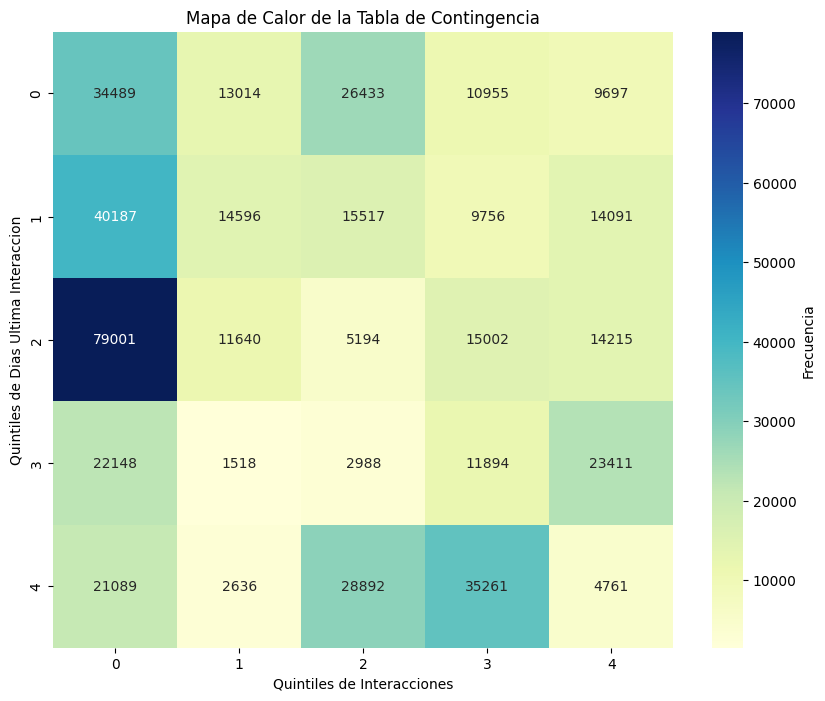

In [10]:
# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Frecuencia'})
plt.xlabel('Quintiles de Interacciones')
plt.ylabel('Quintiles de Dias Ultima Interaccion')
plt.title('Mapa de Calor de la Tabla de Contingencia')
plt.show()

In [11]:
# Llama a la función con el nombre de tu archivo SQL
df_L1 = consulta_archivo('tada_total')
# plot_percentiles(df_L1, 'Dias_interaccion')

tada_total_megabrands.sql
(66595, 3)
                                               td_id  ordenes       money
0  a3bb42f2fdba83fe6636de883babe1b4e83bf5bc56de9f...      194  1034000.00
1  654342176dfc40a2371c93c69bb31f650884a63e380578...      178  5743960.78


[3.0 5.0]


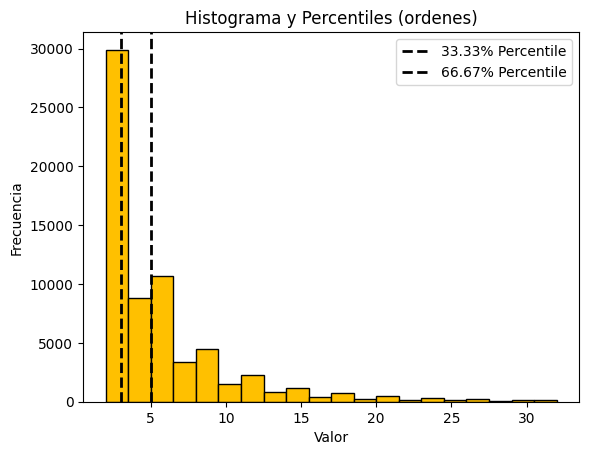

In [13]:
plot_percentiles(df_L1, 'ordenes', 99)

[118860.8024 257583.952 ]


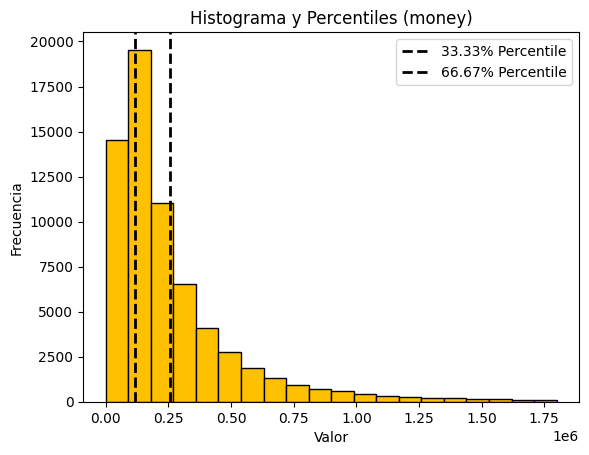

In [27]:
plot_percentiles(df_L1, 'money',99)

In [30]:
df_L1.shape

(66595, 3)

In [32]:
percentile_value_max = np.percentile(df_L1['money'], 99)
df = df_L1[(df_L1['money'] > 0) & (df_L1['money'] < percentile_value_max)].copy()
df.shape

(65929, 3)

In [33]:
percentile_value_max = np.percentile(df['ordenes'], 99)
df = df[(df['ordenes'] > 0) & (df['ordenes'] < percentile_value_max)].copy()
df.shape

(65247, 3)

In [35]:
# Calcular deciles para ambas variables
df['corte_money'] = pd.qcut(df['money'], q=5, labels=False, duplicates='drop')
df['corte_ordenes'] = pd.qcut(df['ordenes'], q=6, labels=False, duplicates='drop')
# Crear una tabla de contingencia (matriz de cruces)
contingency_table = pd.crosstab(df['corte_money'], df['corte_ordenes'])

# Imprimir la tabla de contingencia
print(contingency_table)

corte_ordenes      0     1     2     3     4
corte_money                                 
0              12319   595   120    15     1
1               9488  2260   888   406     7
2               5412  3159  2108  2105   265
3               2161  2154  2267  4529  1938
4                517   618   830  3224  7861


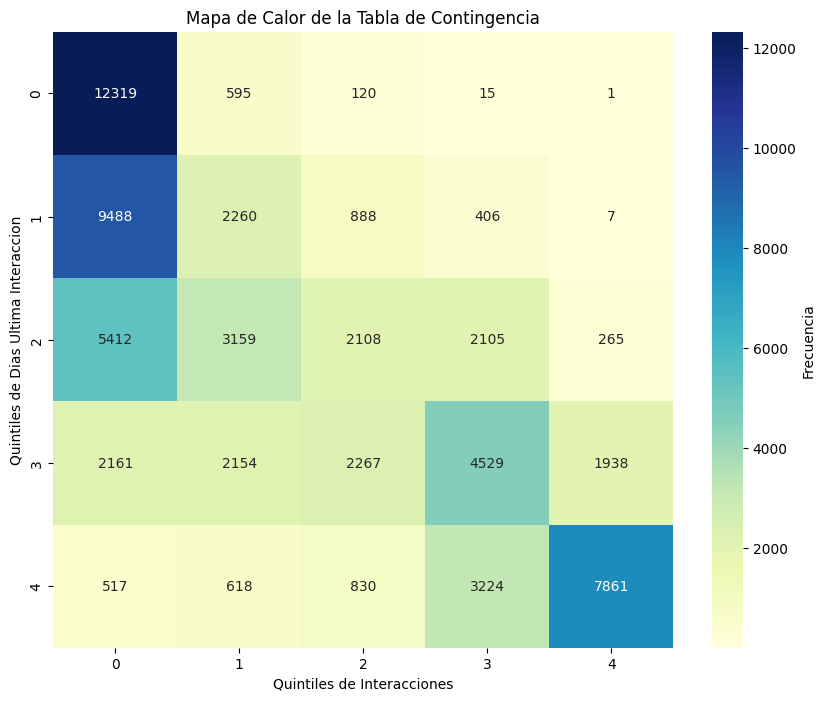

In [36]:
# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Frecuencia'})
plt.xlabel('Quintiles de Interacciones')
plt.ylabel('Quintiles de Dias Ultima Interaccion')
plt.title('Mapa de Calor de la Tabla de Contingencia')
plt.show()